Visualisation d'un **fichier HTML** du **drive**

In [1]:
import IPython
from google.colab import drive
drive.mount('/drive')
IPython.display.HTML(filename='/drive/My Drive/Colab Notebooks/Vestack-MAQUETTE-MEP Venansault v2 - VMC.html')

Mounted at /drive


,A,B
1,Duct Fittings : Coude Gaine Galva : Courbure = 1D : id 15721934,Venansault--Vestack-MAQUETTE-PROD V1.rvt : Structural Framing : M_WF Joist : LMBR 63x175 - Mark 1001 : id 4188024
2,Ducts : Round Duct : raccord par piquage : id 15812147,Venansault--Vestack-MAQUETTE-PROD V1.rvt : Structural Framing : M_WF Joist : LMBR 63x175 - Mark 1001 : id 4188024
3,Ducts : Round Duct : raccord par piquage : id 15812147,Venansault--Vestack-MAQUETTE-PROD V1.rvt : Structural Framing : M_WF Joist : LMBR 75x200 - Mark 2953 : id 4417269
4,Ducts : Round Duct : raccord par piquage : id 15812147,Venansault--Vestack-MAQUETTE-PROD V1.rvt : Structural Framing : M_WF Joist : LMBR 38x38 - Mark 3351 : id 4418474
5,Ducts : Round Duct : raccord par piquage : id 15812147,Venansault--Vestack-MAQUETTE-PROD V1.rvt : Structural Framing : M_WF Joist : LMBR 38x38 - Mark 3352 : id 4418476


**Import du module BeautifulSoup**

C'est une librairie permettant de traiter des données extraites d'un fichier HTML et/ou XML

In [2]:
from bs4 import BeautifulSoup

Import d'un **fichier HTML** du **drive**

In [4]:
with open("/drive/My Drive/Colab Notebooks/Vestack-MAQUETTE-MEP Venansault v2 - VMC.html") as fp:
    soup = BeautifulSoup(fp, "html.parser")

Suppression de l'en-tête du fichier pour conserver que les clashs

In [5]:
import re
soup2=soup.find_all("td")
clashs = []
i=0
for elem in soup2 :
  if i>=3 :
    #s = "abc123AUG|GAC|UGAasdfg789"
    #print(type(elem))
    clashs.append(str(elem))
  i+=1
clashs

['<td>  1  </td>',
 '<td>  Duct Fittings : Coude Gaine Galva : Courbure = 1D : id 15721934  </td>',
 '<td>  Venansault--Vestack-MAQUETTE-PROD V1.rvt : Structural Framing : M_WF Joist : LMBR 63x175 - Mark 1001 : id 4188024  </td>',
 '<td>  2  </td>',
 '<td>  Ducts : Round Duct : raccord par piquage : id 15812147  </td>',
 '<td>  Venansault--Vestack-MAQUETTE-PROD V1.rvt : Structural Framing : M_WF Joist : LMBR 63x175 - Mark 1001 : id 4188024  </td>',
 '<td>  3  </td>',
 '<td>  Ducts : Round Duct : raccord par piquage : id 15812147  </td>',
 '<td>  Venansault--Vestack-MAQUETTE-PROD V1.rvt : Structural Framing : M_WF Joist : LMBR 75x200 - Mark 2953 : id 4417269  </td>',
 '<td>  4  </td>',
 '<td>  Ducts : Round Duct : raccord par piquage : id 15812147  </td>',
 '<td>  Venansault--Vestack-MAQUETTE-PROD V1.rvt : Structural Framing : M_WF Joist : LMBR 38x38 - Mark 3351 : id 4418474  </td>',
 '<td>  5  </td>',
 '<td>  Ducts : Round Duct : raccord par piquage : id 15812147  </td>',
 '<td>  Venan

Isoler les clashs dans des listes différentes [clash = élément MEP + élément ossature avec leurs identifiants]

In [10]:
table = []
i=0
for elem in clashs :
  clashs_mod = elem.split('<td>')
  i+=1
  clash_final=clashs_mod[1].split('</td>')
  table.append(clash_final[0])
j=1
table2,table3,table4= [],[],[]
for elem in table :
  #table2.append(j)
  if j%3 != 0 :
    clash_final2=table[j].split(': id')
    table2.append(clash_final2)
  j+=1

k=1
for elem in table2 :
  for elem2 in elem :
    table3.append(elem2)
    if k%4 ==0:
      table4.append(table3)
      table3=[]
    k+=1
table4

[['  Duct Fittings : Coude Gaine Galva : Courbure = 1D ',
  ' 15721934  ',
  '  Venansault--Vestack-MAQUETTE-PROD V1.rvt : Structural Framing : M_WF Joist : LMBR 63x175 - Mark 1001 ',
  ' 4188024  '],
 ['  Ducts : Round Duct : raccord par piquage ',
  ' 15812147  ',
  '  Venansault--Vestack-MAQUETTE-PROD V1.rvt : Structural Framing : M_WF Joist : LMBR 63x175 - Mark 1001 ',
  ' 4188024  '],
 ['  Ducts : Round Duct : raccord par piquage ',
  ' 15812147  ',
  '  Venansault--Vestack-MAQUETTE-PROD V1.rvt : Structural Framing : M_WF Joist : LMBR 75x200 - Mark 2953 ',
  ' 4417269  '],
 ['  Ducts : Round Duct : raccord par piquage ',
  ' 15812147  ',
  '  Venansault--Vestack-MAQUETTE-PROD V1.rvt : Structural Framing : M_WF Joist : LMBR 38x38 - Mark 3351 ',
  ' 4418474  '],
 ['  Ducts : Round Duct : raccord par piquage ',
  ' 15812147  ',
  '  Venansault--Vestack-MAQUETTE-PROD V1.rvt : Structural Framing : M_WF Joist : LMBR 38x38 - Mark 3352 ',
  ' 4418476  ']]

Préparer une fonction qui récupère les propriétés de chaque élément

In [11]:
#Transformer une liste de chaines de caractère en un tableau de chaines
def transform(liste) :
  liste3,liste4=[],[]
  for elem in liste :
      liste2 = elem.split(':')
      liste3.append(liste2)
      liste2=[]
  for elem in liste3 :
    for elem2 in elem:
      liste4.append(elem2)
  return liste4

In [12]:
table5 = []
for elem in table4 :
  table5.append(transform(elem))
table5

[['  Duct Fittings ',
  ' Coude Gaine Galva ',
  ' Courbure = 1D ',
  ' 15721934  ',
  '  Venansault--Vestack-MAQUETTE-PROD V1.rvt ',
  ' Structural Framing ',
  ' M_WF Joist ',
  ' LMBR 63x175 - Mark 1001 ',
  ' 4188024  '],
 ['  Ducts ',
  ' Round Duct ',
  ' raccord par piquage ',
  ' 15812147  ',
  '  Venansault--Vestack-MAQUETTE-PROD V1.rvt ',
  ' Structural Framing ',
  ' M_WF Joist ',
  ' LMBR 63x175 - Mark 1001 ',
  ' 4188024  '],
 ['  Ducts ',
  ' Round Duct ',
  ' raccord par piquage ',
  ' 15812147  ',
  '  Venansault--Vestack-MAQUETTE-PROD V1.rvt ',
  ' Structural Framing ',
  ' M_WF Joist ',
  ' LMBR 75x200 - Mark 2953 ',
  ' 4417269  '],
 ['  Ducts ',
  ' Round Duct ',
  ' raccord par piquage ',
  ' 15812147  ',
  '  Venansault--Vestack-MAQUETTE-PROD V1.rvt ',
  ' Structural Framing ',
  ' M_WF Joist ',
  ' LMBR 38x38 - Mark 3351 ',
  ' 4418474  '],
 ['  Ducts ',
  ' Round Duct ',
  ' raccord par piquage ',
  ' 15812147  ',
  '  Venansault--Vestack-MAQUETTE-PROD V1.rvt ',

Présenter le résultat de clashs sous un tableau de la bibliothèque Pandas

In [13]:
import pandas as pd
import math as mt
df = pd.DataFrame(data = table5, columns = ['  Catégorie Revit ',' Type Revit ',' Element MEP ',' Id MEP  ',' Projet Lien ',' Structure ',' Element Structure ',
  ' Dimensions Element ',
  ' Id Structure  '])
df

,Catégorie Revit,Type Revit,Element MEP,Id MEP,Projet Lien,Structure,Element Structure,Dimensions Element,Id Structure
0,Duct Fittings,Coude Gaine Galva,Courbure = 1D,15721934,Venansault--Vestack-MAQUETTE-PROD V1.rvt,Structural Framing,M_WF Joist,LMBR 63x175 - Mark 1001,4188024
1,Ducts,Round Duct,raccord par piquage,15812147,Venansault--Vestack-MAQUETTE-PROD V1.rvt,Structural Framing,M_WF Joist,LMBR 63x175 - Mark 1001,4188024
2,Ducts,Round Duct,raccord par piquage,15812147,Venansault--Vestack-MAQUETTE-PROD V1.rvt,Structural Framing,M_WF Joist,LMBR 75x200 - Mark 2953,4417269
3,Ducts,Round Duct,raccord par piquage,15812147,Venansault--Vestack-MAQUETTE-PROD V1.rvt,Structural Framing,M_WF Joist,LMBR 38x38 - Mark 3351,4418474
4,Ducts,Round Duct,raccord par piquage,15812147,Venansault--Vestack-MAQUETTE-PROD V1.rvt,Structural Framing,M_WF Joist,LMBR 38x38 - Mark 3352,4418476


Télécharger le tableau en format .xlsx

In [14]:
import pandas as pd
from google.colab import files
writer = pd.ExcelWriter('TableauDeDetectionClashs.xlsx')
df.to_excel(writer, index = False)
writer.save()
files.download('TableauDeDetectionClashs.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
table5[0]

['  Duct Fittings ',
 ' Coude Gaine Galva ',
 ' Courbure = 1D ',
 ' 15721934  ',
 '  Venansault--Vestack-MAQUETTE-PROD V1.rvt ',
 ' Structural Framing ',
 ' M_WF Joist ',
 ' LMBR 63x175 - Mark 1001 ',
 ' 4188024  ']

**Présentation des clash par type de réseaux**



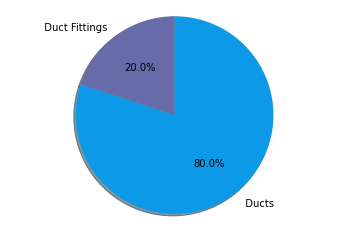

In [16]:
import matplotlib.pyplot as plt
labels_occurence,labels_unique,sizes = [],[],[]
for elem in table5 :
  labels_occurence.append(elem[0])
for elem in table5 :
  if elem[0] not in labels_unique :
    labels_unique.append(elem[0])
#print(labels_occurence)  
#print(labels_unique)
for elem in labels_unique:
  sizes.append(labels_occurence.count(elem))
sizes

import random
long = len(labels_unique)
#print(n)
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
colors = get_colors(long)

#labels = 'Allemagne', 'France', 'Belgique', 'Espagne'
#sizes = [15, 80, 45, 40]
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels_unique, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.savefig('PieChartClashDetection.png')
plt.show()